In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import requests
import base64
import io

In [2]:
USERNAME = 'test1294'
CHALLENGE_URL = 'https://captcha.delorean.codes/u/{}/challenge'.format(USERNAME)

def get_captchas():
    return requests.get(CHALLENGE_URL).json()['images']

captchas = get_captchas()

In [3]:
len(captchas)

1000

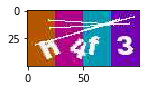

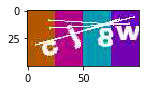

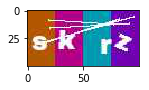

In [417]:
def decode_image(captcha):
    return plt.imread(io.BytesIO(base64.b64decode(captcha['jpg_base64'])), format='jpg')

for captcha in captchas[:3]:
    img = decode_image(captcha)
    plt.figure(figsize=(2, 2))
    plt.imshow(img)
    plt.show()

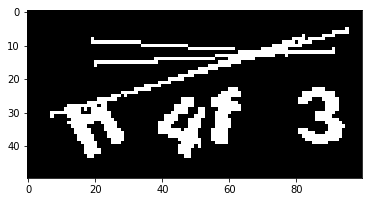

In [404]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def gray2bw(gray, threshold=200):
    return np.where(gray < threshold, 0, 1)

def rgb2bw(rgb):
    return gray2bw(rgb2gray(rgb))

img = decode_image(captchas[0])
gray = rgb2bw(img)
plt.imshow(gray, cmap=plt.get_cmap('gray'))
plt.show()

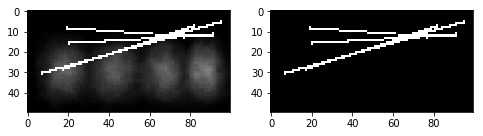

In [179]:
n = 300
bg = np.average([rgb2gray(decode_image(c)) for c in captchas[:n]], axis=0)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(bg, cmap=plt.get_cmap('gray'))
bg = np.where(bg < 200, 0, 255)
plt.subplot(1, 2, 2)
plt.imshow(bg, cmap=plt.get_cmap('gray'))
plt.show()

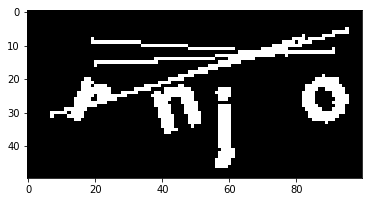

In [427]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
from PIL import ImageOps

ALPHABET = 'abcdefghijklmnopqrstuvwxyz0123456789'

def generate_captcha(text=None, draw_background=True, draw_borders=False):
    if text is None:
        text = np.random.choice(list(ALPHABET), 4)
    img = Image.fromarray(np.uint8(bg) * draw_background, 'L')
    font = ImageFont.truetype('OpenSans-Bold.ttf', 24)
    for i, letter in enumerate(text):
        #draw.text([10 + i * 23, 10], letter, fill='white', font=font)
        patch = Image.new('L', font.getsize(letter))
        ImageDraw.Draw(patch).text((0, 0), letter, font=font, fill='white')
        if draw_borders:
            patch = ImageOps.expand(patch, border=1, fill='white')
        rotation = np.random.randint(-45, 45)
        patch = patch.rotate(rotation, expand=True)
        if draw_borders:
            patch = ImageOps.expand(patch, border=1, fill='white')
        d = 7
        x = 8 + i * 23 + np.random.randint(-d, d)
        y = 10 + np.random.randint(-d, d)
        img.paste(patch, box=(x, y), mask=patch)
    return np.where(np.asarray(img) < 5, 0, 255)

plt.imshow(generate_captcha(), cmap=plt.get_cmap('gray'))
plt.show()

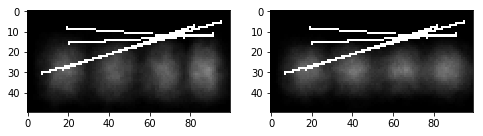

In [428]:
n = 300
real = np.average([rgb2bw(decode_image(c)) for c in captchas[:n]], axis=0)
synth = np.average([generate_captcha() for i in range(n)], axis=0)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(real, cmap=plt.get_cmap('gray'))
plt.subplot(1, 2, 2)
plt.imshow(synth, cmap=plt.get_cmap('gray'))
plt.show()

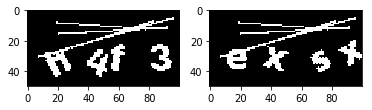

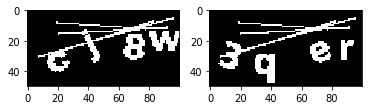

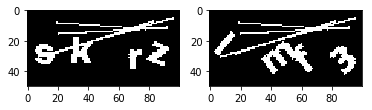

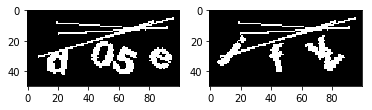

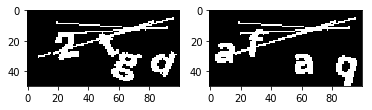

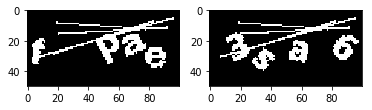

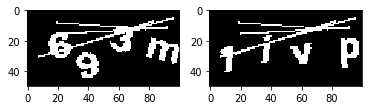

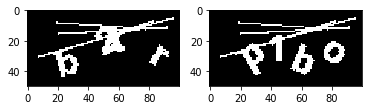

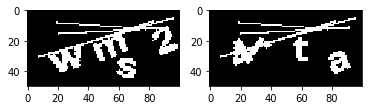

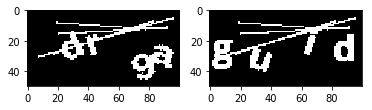

In [429]:
for c in captchas[:10]:
    img = rgb2bw(decode_image(c))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    plt.subplot(1, 2, 2)
    img = generate_captcha()
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    plt.show()